# Abalone Case Study (Practice Project - 4)

In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset

abalone = pd.read_csv("abalone.csv")
abalone

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
# Shape of the dataset

print("Shape of the dataset -->",abalone.shape)

Shape of the dataset --> (4177, 9)


## Quick information about dataset

In [5]:
# Quick information about dataset

abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB



No any column found as null.
Our Target Column is : Rings

In [6]:
# Describing the dataset

abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


It seems that 'Height' column has '0' value. Let's check how many zeros are available in this column.

In [7]:
index = np.where(abalone["Height"] == 0)
index

(array([1257, 3996], dtype=int64),)

There are only 2 values are available in Height column. Let's fillout this.

##  Dealing with '0' values which present in Height Column

In [8]:
abalone["Height"] = abalone["Height"].replace(0, abalone["Height"].mean())

In [9]:
index = np.where(abalone["Height"] == 0)
index

(array([], dtype=int64),)

Now it's clear that all zeros are fixed.

In [10]:
# Describing the dataset again for more analysis

abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139583,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041715,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


It seems that column 'Length', 'Diameter' and 'Height' have very less 'min' value, so there can be skewness in downside and column 'Whole weight','Shucked weight'. 'Viscera weight' and 'Shell weight' has maximum 'max' values, so there can be some skewness in upside and column 'Height' has very high 'max' value, so there can be very high skewness.

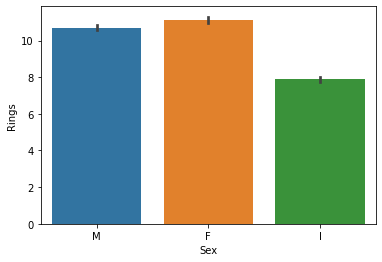

In [12]:
# Let's plot a graph between Rings & Sex

sns.barplot(x="Sex", y="Rings", data = abalone)
plt.show()

## Convert categorical column to numerical column

In [13]:
final_abalone = pd.get_dummies(abalone,drop_first=True)
final_abalone

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,1,0
...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,0,0


## Outliers checking

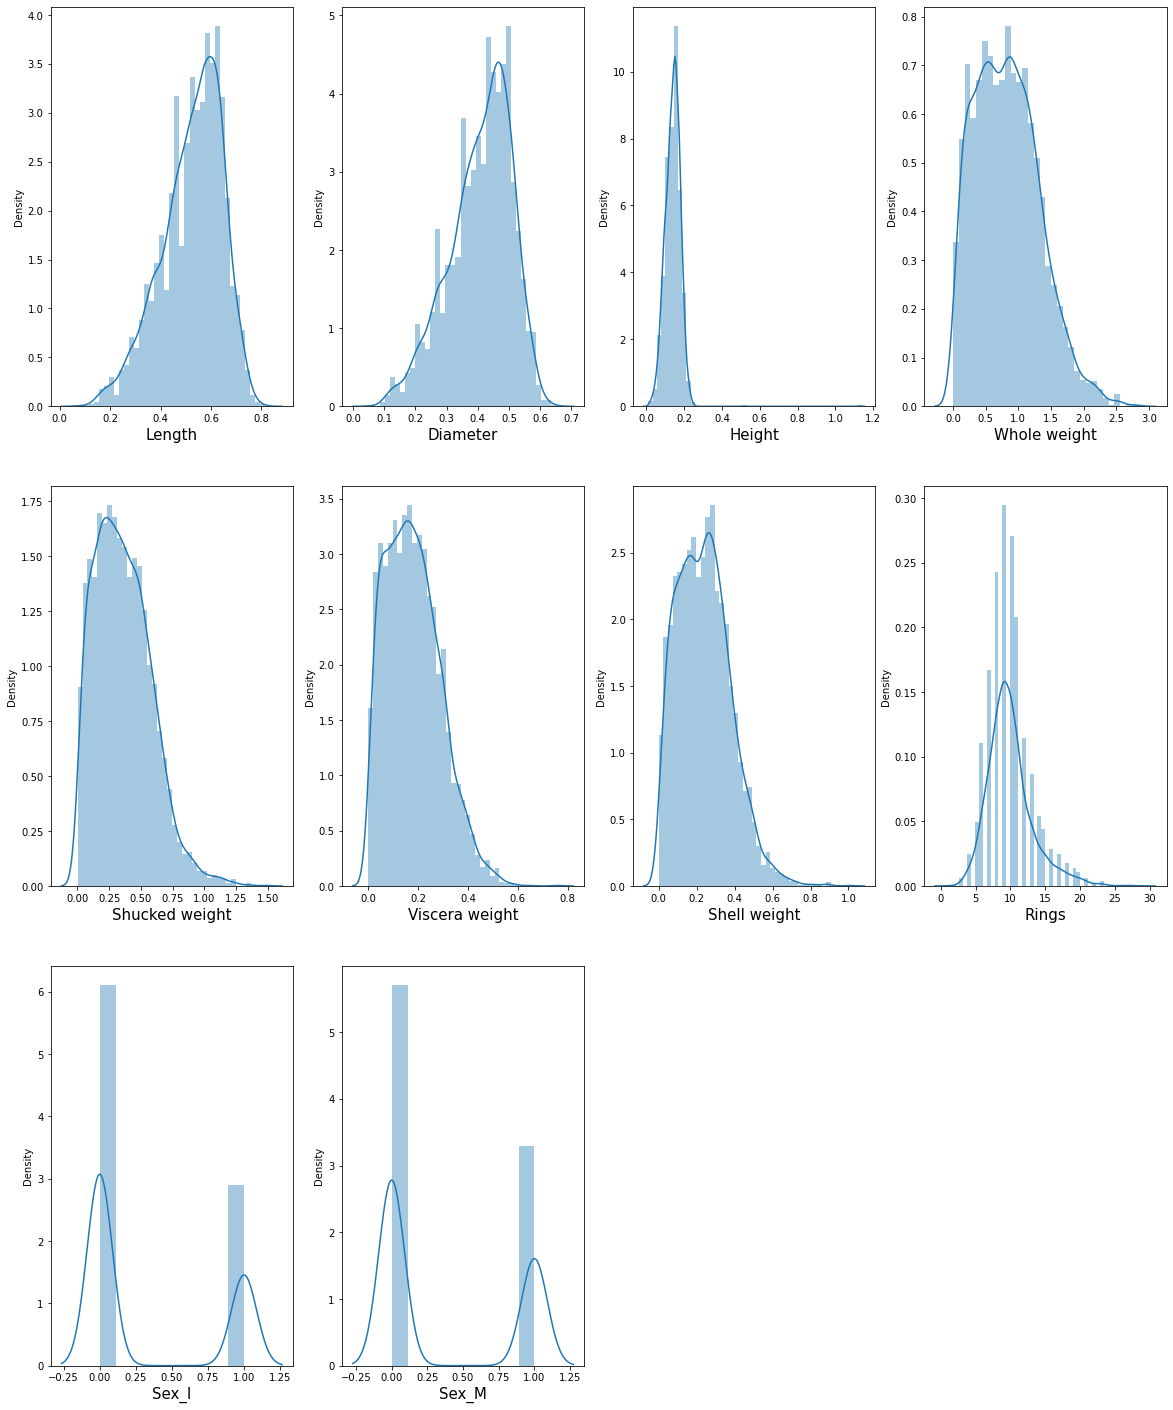

In [15]:
plt.figure(figsize = (20,25), facecolor = 'white')
graphplot = 1
for column in final_abalone:
    if graphplot <= 12:
        ax = plt.subplot(3,4,graphplot)
        sns.distplot(final_abalone[column])
        plt.xlabel(column,fontsize = 15)
    graphplot +=1
plt.show()

## Checking skewness

In [16]:
abalone.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.167124
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

Let's consider the skewness range between -0.5 to +0.5, Now Let's go for outliers removal and fix this range.

## Removing Outliers

In [17]:
features = ["Length","Diameter", "Height","Whole weight","Shucked weight","Viscera weight","Shell weight","Rings"]


# I am not selecting 'Sex' because it is our target column

In [18]:
from sklearn.preprocessing import PowerTransformer

In [19]:
pow_tra = PowerTransformer()

abalone[features] = pow_tra.fit_transform(abalone[features].values)

abalone

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,-0.685502,-0.549860,-1.131487,-0.576766,-0.540989,-0.693283,-0.587809,1.482358
1,M,-1.396344,-1.387333,-1.272338,-1.351761,-1.311662,-1.332953,-1.332420,-0.949135
2,F,-0.070774,0.008537,-0.065913,-0.198099,-0.366116,-0.255135,-0.098262,-0.176075
3,M,-0.797286,-0.549860,-0.322497,-0.571893,-0.591672,-0.547782,-0.544931,0.156908
4,I,-1.513796,-1.459659,-1.559473,-1.413146,-1.380201,-1.451759,-1.485528,-0.949135
...,...,...,...,...,...,...,...,...,...
4172,F,0.249836,0.345636,0.667542,0.241948,0.194158,0.639623,0.193008,0.462368
4173,M,0.492813,0.230611,-0.065913,0.395706,0.495450,0.433568,0.275215,0.156908
4174,M,0.593366,0.645191,1.567779,0.777944,0.838137,1.015607,0.598398,-0.176075
4175,F,0.853375,0.769928,0.307435,0.633874,0.858739,0.815184,0.519145,0.156908


## Skewness after removing outliers

In [20]:
abalone.skew()

Length           -0.066669
Diameter         -0.065977
Height           -0.113754
Whole weight     -0.003980
Shucked weight    0.027351
Viscera weight    0.039780
Shell weight      0.023390
Rings             0.004429
dtype: float64

Now it seems that selected features are in the skewness range. And due to this all outliers has been removed.

All the skewness has been gone

## Visualize the correlation between feature and target

In [21]:
abalone.drop("Rings",axis= 1).corrwith(abalone["Rings"])

Length            0.609411
Diameter          0.627972
Height            0.669727
Whole weight      0.629344
Shucked weight    0.536797
Viscera weight    0.602611
Shell weight      0.693872
dtype: float64

<AxesSubplot:title={'center':'Correlation Features vs Target'}>

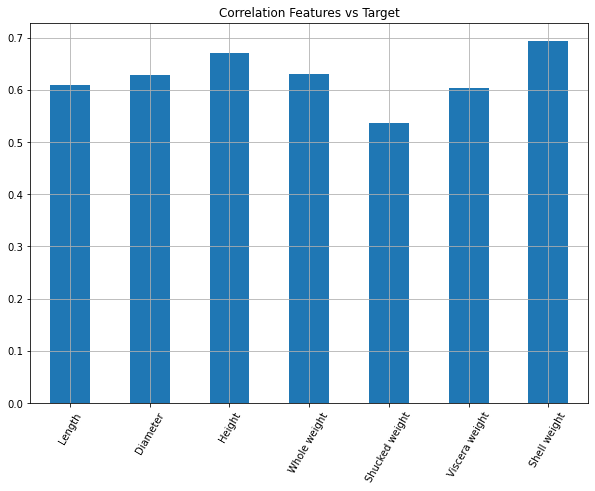

In [22]:
abalone.drop("Rings",axis=1).corrwith(abalone["Rings"]).plot(kind='bar',grid=True, figsize = (10,7),
                                                            rot=60, title="Correlation Features vs Target", fontsize=10)

It seems that all the features are highly correlated to the target column 'Rings'

## Visualizing the correlation between features (Multicollinearity)

In [24]:
cor = abalone.corr()
cor

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.982954,0.875689,0.972757,0.956482,0.953238,0.946681,0.609411
Diameter,0.982954,1.000000,0.882403,0.971244,0.949864,0.948235,0.953241,0.627972
Height,0.875689,0.882403,1.000000,0.895471,0.859406,0.877242,0.898340,0.669727
Whole weight,0.972757,0.971244,0.895471,1.000000,0.977466,0.974887,0.968830,0.629344
Shucked weight,0.956482,0.949864,0.859406,0.977466,1.000000,0.948587,0.917084,0.536797
Viscera weight,0.953238,0.948235,0.877242,0.974887,0.948587,1.000000,0.935002,0.602611
Shell weight,0.946681,0.953241,0.898340,0.968830,0.917084,0.935002,1.000000,0.693872
Rings,0.609411,0.627972,0.669727,0.629344,0.536797,0.602611,0.693872,1.000000


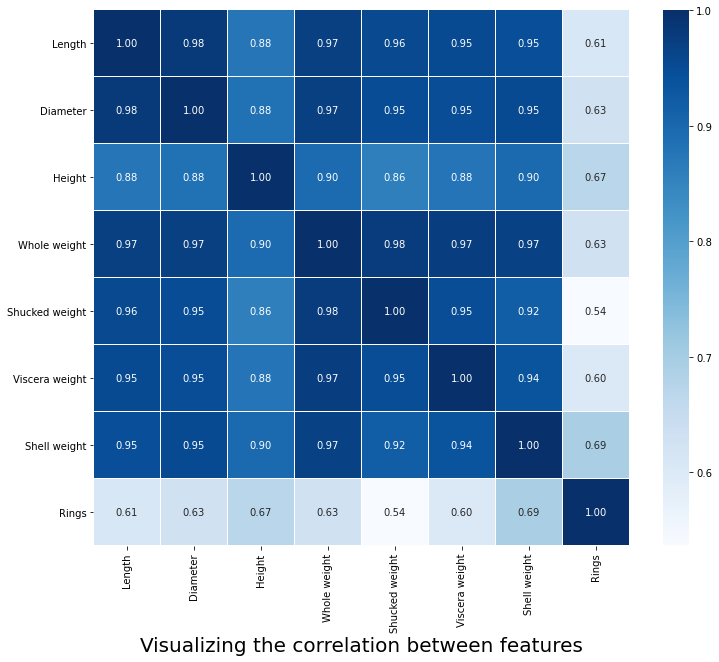

In [36]:
plt.figure(figsize = (12,12))
sns.heatmap(cor, cbar=True, square = True, cbar_kws = {"shrink": .82},
            annot=True, annot_kws={"size":10,},fmt=".2f",linewidths = .2, cmap='Blues')
plt.xlabel("Visualizing the correlation between features", fontsize = 20)
plt.show()

## Before proceeding to the model let's divide the dataset into input & output

In [32]:
x = final_abalone.drop("Rings",axis=1)
y = final_abalone["Rings"]

In [41]:
# Let's import some necessary libraries

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [44]:
# Let's do scaling before proceed to the model building

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-0.57455813, -0.43214879, -1.06887437, ..., -0.63821689,
        -0.68801788,  1.31667716],
       [-1.44898585, -1.439929  , -1.18874848, ..., -1.21298732,
        -0.68801788,  1.31667716],
       [ 0.05003309,  0.12213032, -0.10988145, ..., -0.20713907,
        -0.68801788, -0.75948762],
       ...,
       [ 0.6329849 ,  0.67640943,  1.56835616, ...,  0.49695471,
        -0.68801788,  1.31667716],
       [ 0.84118198,  0.77718745,  0.2497409 , ...,  0.41073914,
        -0.68801788, -0.75948762],
       [ 1.54905203,  1.48263359,  1.32860793, ...,  1.84048058,
        -0.68801788,  1.31667716]])

### Let's find best random state

In [105]:
def model(model,x_scaled,y):
    max_r2_score = 0
    max_r_state = 0
    for i in range(20,101):
        x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        r_scor = r2_score(y_test, y_pred)
        print("R_2 Score corresponding to ",i,"is",r_scor)
        if r_scor > max_r2_score:
            max_r2_score = r_scor
            max_r_state = i
    print("\n","="*70,"\nMaximum R_2 Score corresponding to ",max_r_state,"  is  ",max_r2_score,sep="")

## Model Building Start -->

In [106]:
# Let's use Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor()

model(DTR,x_scaled, np.log1p(y))

R_2 Score corresponding to  20 is 0.3365991588264935
R_2 Score corresponding to  21 is 0.29692061321332397
R_2 Score corresponding to  22 is 0.17836931711781912
R_2 Score corresponding to  23 is 0.23365061390267539
R_2 Score corresponding to  24 is 0.33880504768719355
R_2 Score corresponding to  25 is 0.16793745113361702
R_2 Score corresponding to  26 is 0.36021416796816286
R_2 Score corresponding to  27 is 0.30269055514775545
R_2 Score corresponding to  28 is 0.2973178904236605
R_2 Score corresponding to  29 is 0.31122962862133785
R_2 Score corresponding to  30 is 0.3421299110815561
R_2 Score corresponding to  31 is 0.38601186543758326
R_2 Score corresponding to  32 is 0.3318346961585871
R_2 Score corresponding to  33 is 0.37396171842467196
R_2 Score corresponding to  34 is 0.32959992337626964
R_2 Score corresponding to  35 is 0.2609145855357201
R_2 Score corresponding to  36 is 0.33005486058470634
R_2 Score corresponding to  37 is 0.31972572222457873
R_2 Score corresponding to  38 is

#### Decision Tree Regressor is not performing well, Let's check with another regressor

In [107]:
# Let's use Linear Regression

from sklearn.linear_model import LinearRegression

LR = LinearRegression()

model(LR,x_scaled,np.log1p(y))

R_2 Score corresponding to  20 is 0.5731885515121353
R_2 Score corresponding to  21 is 0.5995533670820288
R_2 Score corresponding to  22 is 0.5234539614309259
R_2 Score corresponding to  23 is 0.5457925095700351
R_2 Score corresponding to  24 is 0.586796322330476
R_2 Score corresponding to  25 is 0.48105982619109955
R_2 Score corresponding to  26 is 0.6206986041343152
R_2 Score corresponding to  27 is 0.5532881505905385
R_2 Score corresponding to  28 is 0.6119293216560242
R_2 Score corresponding to  29 is 0.6075034853301071
R_2 Score corresponding to  30 is 0.6470203210215197
R_2 Score corresponding to  31 is 0.5957338665781629
R_2 Score corresponding to  32 is 0.5913861057944197
R_2 Score corresponding to  33 is 0.6100073986159311
R_2 Score corresponding to  34 is 0.5681930000817055
R_2 Score corresponding to  35 is 0.5483793910928493
R_2 Score corresponding to  36 is 0.6026095903401094
R_2 Score corresponding to  37 is 0.6099798068857067
R_2 Score corresponding to  38 is 0.6110606182

#### Linear Regression performing better than Decision Tree Regression, Let's check if any model will perform better than this Linear Regression

In [108]:
# let's use K-Neighbors Regression

from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor()

model(KNN,x_scaled, np.log1p(y))

R_2 Score corresponding to  20 is 0.5699569596084735
R_2 Score corresponding to  21 is 0.5889713181768217
R_2 Score corresponding to  22 is 0.5523199309977689
R_2 Score corresponding to  23 is 0.5747666314558082
R_2 Score corresponding to  24 is 0.6185442036550383
R_2 Score corresponding to  25 is 0.5335609531958154
R_2 Score corresponding to  26 is 0.5959105799156842
R_2 Score corresponding to  27 is 0.5889791752150848
R_2 Score corresponding to  28 is 0.5961483912741952
R_2 Score corresponding to  29 is 0.5881349702331605
R_2 Score corresponding to  30 is 0.6296981051252353
R_2 Score corresponding to  31 is 0.611936232163509
R_2 Score corresponding to  32 is 0.5869228446065362
R_2 Score corresponding to  33 is 0.5880326903922927
R_2 Score corresponding to  34 is 0.5753839930055114
R_2 Score corresponding to  35 is 0.5878935235210356
R_2 Score corresponding to  36 is 0.5827655103869823
R_2 Score corresponding to  37 is 0.5939236810435682
R_2 Score corresponding to  38 is 0.62467875375

#### K-Neighbors Regression is performing well but not better than Linear Regression, Let's check Random Forest Now...

In [109]:
# Let's use Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor()

model(RFR,x_scaled,np.log1p(y))

R_2 Score corresponding to  20 is 0.6241465104823972
R_2 Score corresponding to  21 is 0.6225783149508893
R_2 Score corresponding to  22 is 0.597293023697786
R_2 Score corresponding to  23 is 0.6223461531025148
R_2 Score corresponding to  24 is 0.6238899000964533
R_2 Score corresponding to  25 is 0.5874110873522015
R_2 Score corresponding to  26 is 0.641629965285728
R_2 Score corresponding to  27 is 0.6345833602123062
R_2 Score corresponding to  28 is 0.6475745950164082
R_2 Score corresponding to  29 is 0.6336690951987638
R_2 Score corresponding to  30 is 0.660698260288088
R_2 Score corresponding to  31 is 0.6460131160637421
R_2 Score corresponding to  32 is 0.6113644667858921
R_2 Score corresponding to  33 is 0.6311411027787208
R_2 Score corresponding to  34 is 0.6208525211160741
R_2 Score corresponding to  35 is 0.6184749438610435
R_2 Score corresponding to  36 is 0.6246812575793985
R_2 Score corresponding to  37 is 0.6429316532444588
R_2 Score corresponding to  38 is 0.6525465914706

#### Random Forest Regression is looking better than about 3 Models. So, let's use cross_val_score for better score.

## Cross Validation Scores

In [110]:
from sklearn.model_selection import cross_val_score

In [116]:
print("Random Forest Regressor : ",cross_val_score(RFR,x_scaled,np.log1p(y),cv=5,scoring='r2').mean())
print("K-Neighhors Regressor   : ",cross_val_score(KNN,x_scaled,np.log1p(y),cv=5,scoring='r2').mean())
print("Decision Tree Regressor :",cross_val_score(DTR,x_scaled,np.log1p(y),cv=5,scoring='r2').mean())
print("Linear Regression       : ",cross_val_score(LR,x_scaled,np.log1p(y),cv=5,scoring='r2').mean())

Random Forest Regressor :  0.5635847712319636
K-Neighhors Regressor   :  0.5264061858864665
Decision Tree Regressor : 0.16356120875079638
Linear Regression       :  0.5142808260926659


## Difference after cross_val_score

#### Random Forest Regression = 0.6606 - 0.5635 = 0.0971
#### K-Neighbors Regression      = 0.6344 - 0.5264 = 0.1080
#### Decision Tree Regression    = 0.4050 - 0.1635 = 0.2415
#### Linear Regression                 = 0.6470 - 0.5142 = 0.1328

#### Now it is clear that Random Forest Regressor having very less difference after cross_val_score. So let's final it & start the hyperparameter tuning with Random Forest Regressor

## Hyper Parameter Tuning with Random Forest Regression

In [117]:
from sklearn.model_selection import GridSearchCV

In [128]:
param_grid = {"n_estimators" : [5,6,7],
             "criterion" : ['mse','mae'],
             "max_depth" : [17,19],
             "min_samples_split" : [2,3],
             "min_samples_leaf" : [7,9]}

In [129]:
grid_search = GridSearchCV(RFR,param_grid=param_grid)
grid_search.fit(x_scaled, np.log1p(y))
grid_search.best_params_

{'criterion': 'mae',
 'max_depth': 19,
 'min_samples_leaf': 7,
 'min_samples_split': 2,
 'n_estimators': 7}

## Final Model

In [145]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,np.log1p(y),test_size = 0.25, random_state = 30)
y_train = np.log1p(y_train)

In [146]:
Abalone_Final_Model = RandomForestRegressor(n_estimators = 100, criterion = 'mse',
                                           min_samples_leaf = 5, min_samples_split = 2, max_depth = 19)

Abalone_Final_Model.fit(x_train,y_train)
y_pred = Abalone_Final_Model.predict(x_test)
r_score = r2_score(y_test,np.expm1(y_pred))
r_score

0.6753232136051945

After Hyper Parameter Tuning, I have to change some parameters because I didn't get better result before, And Now I have better score.

## Saving The Final Model

In [147]:
import joblib

joblib.dump(Abalone_Final_Model,"Abalone Final Model.pkl")

['Abalone Final Model.pkl']